<a href="https://colab.research.google.com/github/SrijanDawn/LSTM_Improved_Model--diff_dataset/blob/main/Copy_of_LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [214]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [215]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [216]:
data = load_data('TCS.NS')
df=data
df.head()

/tmp/ipython-input-1794888428.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551331,270.131983,266.625842,268.672566,1963682
1,2010-01-05,267.622650,270.363486,265.736108,268.743908,2014488
2,2010-01-06,261.571259,267.747037,260.912756,267.622441,3349176
3,2010-01-07,254.292145,263.190946,253.081899,261.802724,6474892
4,2010-01-08,249.095215,255.751522,247.920578,254.861642,6048178


In [217]:
# Check available columns
print("Columns before dropping:", df.columns)

# List of columns you want to drop
cols_to_drop = ['Date', 'Adj Close']

# Drop only those that exist
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(existing_cols_to_drop, axis=1)

# Show first few rows
print("Columns after dropping:", df.columns)
print(df.head())


Columns before dropping: MultiIndex([(  'Date',       ''),
            ( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
Columns after dropping: MultiIndex([( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
Price        Close        High         Low        Open   Volume
Ticker      TCS.NS      TCS.NS      TCS.NS      TCS.NS   TCS.NS
0       267.551331  270.131983  266.625842  268.672566  1963682
1       267.622650  270.363486  265.736108  268.743908  2014488
2       261.571259  267.747037  260.912756  267.622441  3349176
3       254.292145  263.190946  253.081899  261.802724  6474892
4       249.095215  255.751522  247.920578  254.861642  6048178


/tmp/ipython-input-2560777674.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(existing_cols_to_drop, axis=1)


Visualizing Closing Price

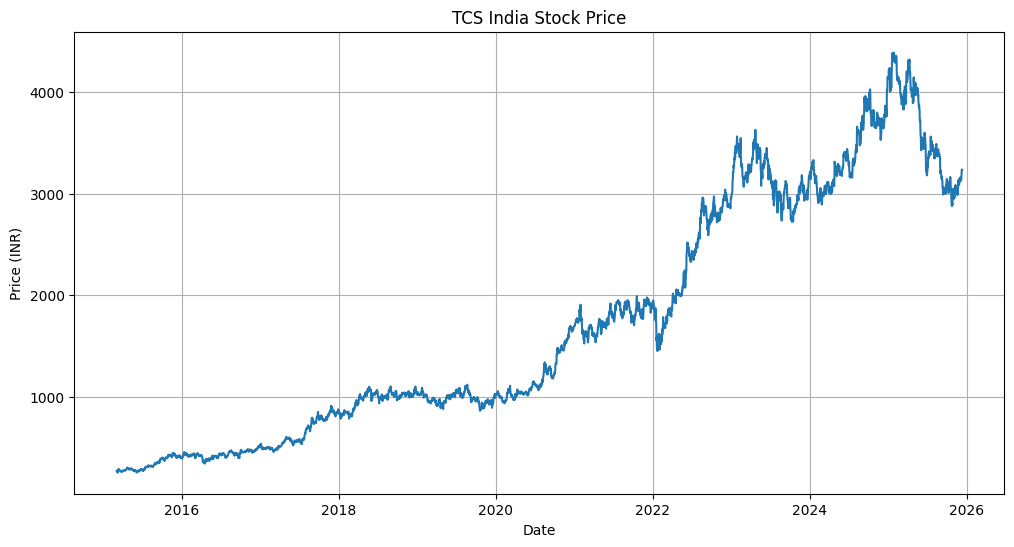

In [218]:
dates = pd.date_range(end=pd.Timestamp.today(), periods=3934)
plt.figure(figsize=(12, 6))
plt.plot(dates, df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [219]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,267.551331,270.131983,266.625842,268.672566,1963682
1,267.622650,270.363486,265.736108,268.743908,2014488
2,261.571259,267.747037,260.912756,267.622441,3349176
3,254.292145,263.190946,253.081899,261.802724,6474892
4,249.095215,255.751522,247.920578,254.861642,6048178
...,...,...,...,...,...
3929,3135.699951,3144.000000,3120.399902,3131.000000,2512003
3930,3180.000000,3211.899902,3139.000000,3140.000000,3952112
3931,3229.199951,3250.000000,3187.399902,3194.000000,5025905


# Plotting moving averages of 100 day

---



In [220]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3929,3068.351829
3930,3066.571458
3931,3066.434866
3932,3066.818208


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

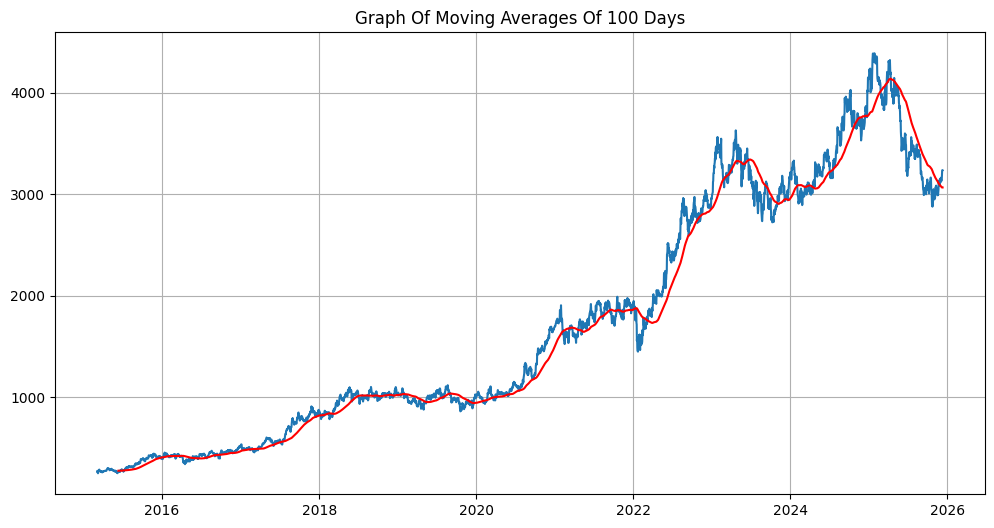

In [221]:
dates = pd.date_range(end=pd.Timestamp.today(), periods=3934)
plt.figure(figsize = (12,6))
plt.plot(dates, df.Close)
plt.plot(dates, ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [222]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3929,3262.991343
3930,3259.387368
3931,3256.095333
3932,3253.045132


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

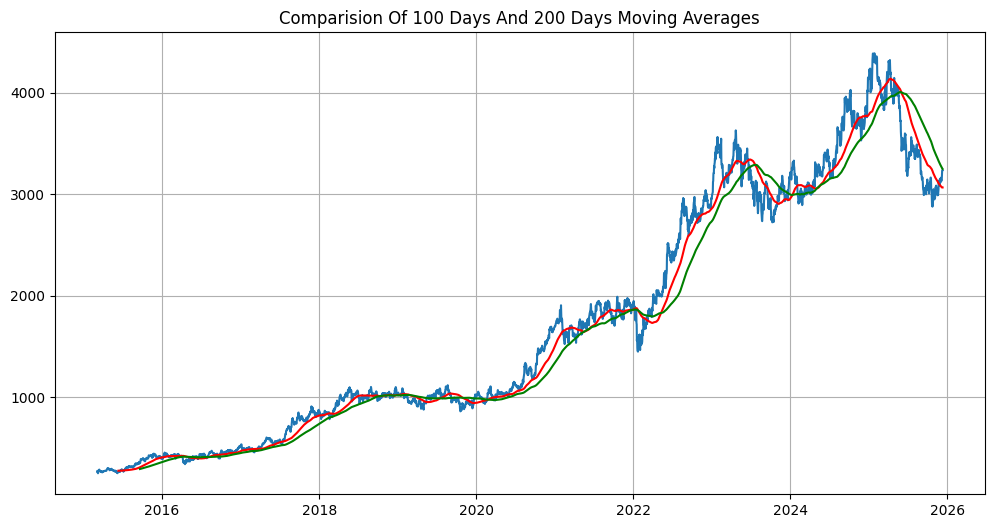

In [223]:
dates = pd.date_range(end=pd.Timestamp.today(), periods=3934)
plt.figure(figsize = (12,6))
plt.plot(dates, df.Close)
plt.plot(dates, ma100, 'r')
plt.plot(dates, ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [224]:
df.shape

(3934, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [225]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2753, 6)
(1181, 6)


In [226]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551331,270.131983,266.625842,268.672566,1963682
1,2010-01-05,267.622650,270.363486,265.736108,268.743908,2014488
2,2010-01-06,261.571259,267.747037,260.912756,267.622441,3349176
3,2010-01-07,254.292145,263.190946,253.081899,261.802724,6474892
4,2010-01-08,249.095215,255.751522,247.920578,254.861642,6048178


In [227]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2753,2021-03-01,2617.327637,2653.846034,2597.278432,2618.938784,3265871
2754,2021-03-02,2690.856201,2707.548936,2638.629509,2649.370199,3306469
2755,2021-03-03,2738.071289,2742.456985,2682.398521,2716.500310,3509857
2756,2021-03-04,2729.656982,2758.075060,2699.538383,2705.758989,3916760
2757,2021-03-05,2692.377930,2741.740267,2682.129564,2699.583187,3203686


# Using MinMax scaler for normalization of the dataset

---



In [228]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [229]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [230]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00666971],
       [0.00669603],
       [0.00628237],
       ...,
       [0.88875805],
       [0.88941813],
       [0.88479627]])

In [231]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [232]:
x_train.shape

(2653, 100, 1)

# ML Model (LSTM)

---



In [233]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [234]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [235]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 318ms/step - loss: 0.0505 - mean_absolute_error: 0.1556
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - loss: 0.0058 - mean_absolute_error: 0.0516
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0043 - mean_absolute_error: 0.0435
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - loss: 0.0050 - mean_absolute_error: 0.0470
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - loss: 0.0046 - mean_absolute_error: 0.0455
Epoch 6/100
56/83 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - loss: 0.0038 - mean_absolute_error: 0.0401

In [ ]:
model.save('keras_model.keras')

In [ ]:
test_close.shape

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [ ]:
dates = pd.date_range(end=pd.Timestamp.today(), periods=1181)
plt.figure(figsize = (12,6))
plt.plot(dates, y_test + 2150, 'b', label = "Original Price")
plt.plot(dates, y_pred + 2150, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# TREND-BASED PROJECTION (Geometric Brownian Motion - 500 DAYS)
HISTORY_DAYS = 500 # Use the last 500 days for trend calculation
FUTURE_DAYS = 50   # Project 50 days into the future
if len(input_data) < HISTORY_DAYS:
    HISTORY_DAYS = len(input_data)
    print(f"Warning: Only {HISTORY_DAYS} available days used for history.")

last_history_scaled = input_data[-HISTORY_DAYS:]
last_history_prices = scaler.inverse_transform(last_history_scaled).flatten()
log_returns = np.log(last_history_prices[1:] / last_history_prices[:-1])
drift = np.mean(log_returns)
stdev = np.std(log_returns)

print(f"Detected Daily Trend (Drift, based on {HISTORY_DAYS} days): {drift:.6f}")
print(f"Detected Volatility (stdev, based on {HISTORY_DAYS} days): {stdev:.6f}")
print("-" * 50)
future_prices = []
last_price = last_history_prices[-1]

for i in range(FUTURE_DAYS):
    # The GBM formula: Old Price * exp(Trend + Volatility * RandomShock)
    shock = drift + stdev * np.random.normal()
    new_price = last_price * np.exp(shock)
    future_prices.append(new_price)
    last_price = new_price

# Print Predicted Price for Tomorrow
price = future_prices[0]
text = f"Predicted Price for Tomorrow: INR {price:.2f}"
border = "*" * (len(text) + 8)
print(border)
print(f"**  {text}  **")
print(border)

plt.figure(figsize=(12, 6))
dates = pd.date_range(end=pd.Timestamp.today(), periods=500)
plt.plot(dates, last_history_prices,
         label=f'Last {HISTORY_DAYS} Days (Actual)', color='blue')

# Plot Prediction
combined_future = np.insert(np.array(future_prices), 0, last_history_prices[-1])
dates = pd.date_range(start=pd.Timestamp.today(), periods=51)
plt.plot(dates, combined_future,
         label=f'Next {FUTURE_DAYS} Days (GBM Projection)', color='red')

plt.title(f'{FUTURE_DAYS}-Day Stock Price Projection Based on {HISTORY_DAYS} Days of Momentum')
plt.xlabel('Trading Days (Relative)')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

In [ ]:
plt.scatter(actual, predicted, s=1)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()